# 분석에 앞서 분석할 데이터 확인
- 분석할 데이터 : Titanic Data, 사상 최대의 해난 사고이며 1,500명의 희생자가 생김
- 분석 목적 : 신상정보를 활용하여 승선한 사람들의 생존여부를 예측하는 모델 생성
- 활용 라이브러리 : 미리 정해놓고 하면 안되지만 필사이기에 정해져있음
    - 시각화 : matplotlib, seaborn, plotly
    - 분석도구 : pandas, numpy
    - ML도구 : sklearn
### 프로세스
1. 데이터셋 확인 : 
    - 1.1 Null data check
    - 1.2 Target label check
2. 탐색적 데이터 분석( exploratory data analysis) : 여러 feature를 개별적으로분석, feature간의 상관관계 확인, 시각화 툴을 통한 Insight 발견
3. feature engineering : 모델의 성능을 높이기 위해 feature들을 변형(engineering종류 - 가변수화, 그룹화, 구간화, 텍스트 데이터 처리 등)
4. model 만들기 : 이 곳에서는 sklearn 사용(딥러닝을 위해 tensorflow나 pytorch사용 가능)
5. 모델 평가 : 예측 성능 확인, 문제에 따라 모델 평가 방식도 달라짐

In [1]:
# 사용하는 라이브러리
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# seaborn scheme,  font_scale setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 1. Data Set Check

In [5]:
# zip 파일에서 data 압축풀기
titanic_zip = zipfile.ZipFile('E:/github/Titanic/data/titanic.zip')
titanic_zip.extractall('E:/github/Titanic/data')
titanic_zip.close()

In [6]:
# train, test data 불러오기
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [10]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S


In [14]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [15]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 변수 정리
PassengerId : 고객 ID, 없어도 되는 변수, int64  
Survived : 생존여부, target 변수, int64  
Pclass : 고객 class, int64  
Name : 이름, 없어도 되는 변수, object  
Sex : 성별, object  
Age : 나이, float64 (결측이 있을 가능성이 있음)  
SibSp : 함께 탑승한 형제 or 배우자 수, int64  
Parch : 함께 탑승한 부모, 아이 수, int64  
Ticket : 티켓번호, object  
Fare : 탑승료, float64 (결측이 있을 가능성이 있음)  
Cabin : 객실 번호, object  
Embarked : 탑승 항구, object  

- 변수만 보고 생각해 볼 만한 것
    - 고객ID, 이름은 제거 가능
    - 나이와 ,Fare는 결측이 있을 수도 있음
    - SibSp와 Parch는 합쳐서도 볼 수 있음, 0일 때와 아닐 때의 생존여부 차이 확인
    - 티켓번호와, 객실번호, class는 연관성이 있을 수 있음
    - age와 carbin이 전체 891개에서 개수가 부족함

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- count값을 보았을 때, passengerId(전체기준으로 봄)와 다른 값을 가진 변수가 있음(결측이 있을 가능성이 높음)    
-> 시각화가 필요함

## 1.1 Null data check

In [30]:
for col in train.columns :
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


{:>10} 는 해당 출력물을 오른쪽 정렬하는 코드, \t는 탭하여 줄맞추어 다음 결과 출력  
{:.2f} 는 소숫점 둘째자리까지 출력하는 코드, .2가 소숫점을 표시, f는 실수로 표현(없으면 지수형으로 나옴)

In [31]:
for col in test.columns :
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 20.57%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.24%
column :      Cabin	 Percent of NaN value : 78.23%
column :   Embarked	 Percent of NaN value : 0.00%


<AxesSubplot:>

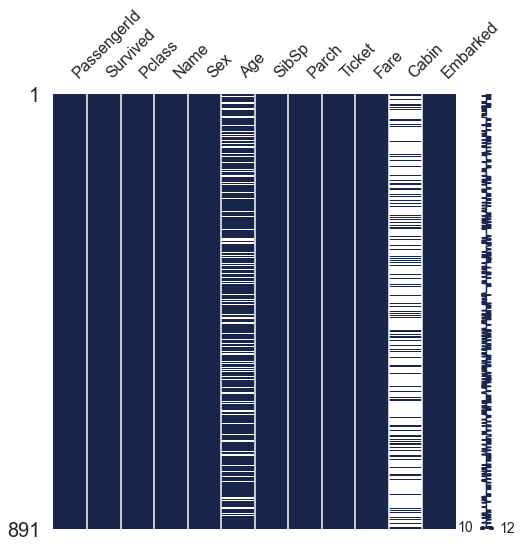

In [41]:
# missingno 함수를 사용한 결측값 시각화
msno.matrix(df=train, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

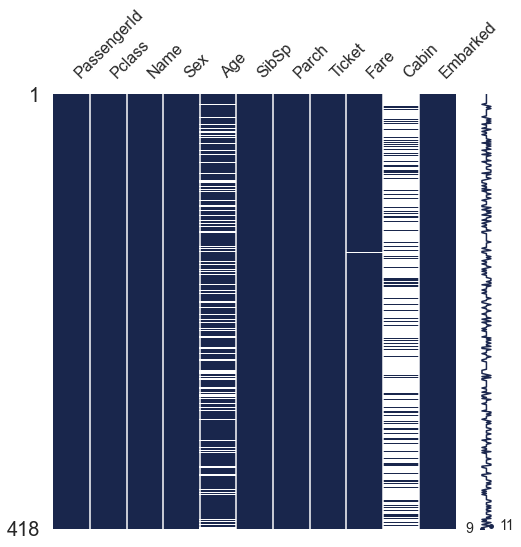

In [42]:
# test data 결측 시각화
msno.matrix(df=test, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

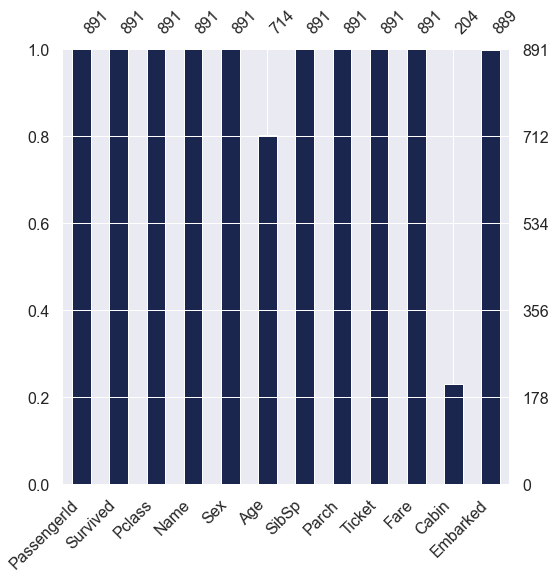

In [43]:
msno.bar(df=train, figsize=(8, 8), color=(0.1, 0.15, 0.3))

<AxesSubplot:>

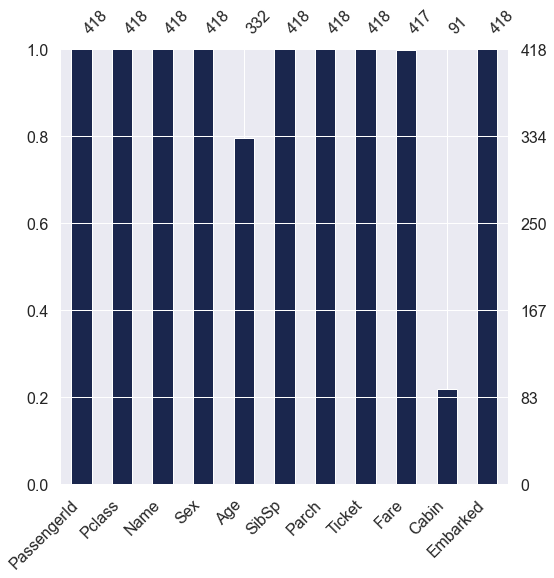

In [44]:
msno.bar(df=test, figsize=(8, 8), color=(0.1, 0.15, 0.3))

결과  
- train : Age(19.87%), Cabin(77.10%), Embarked(0.22%) 결측
- test : Age(20.57%), Fare(0.24%), Cabin(78.23%) 결측  
Age, Embarked, Fare의 결측을 해결하는 방법을 찾고 Cabin은 제거하는 방향으로 가야할 듯  
- 너무 적은 결측이 있는 것들은 msno의 시각화에서 보이지 않음, matrix보단 bar가 수치 체크에는 더 좋을 듯


## 1.2 Target label check
- target label의 분포 확인 : 1과 0의 분포에 따라 모델의 평가 방법이 달라짐

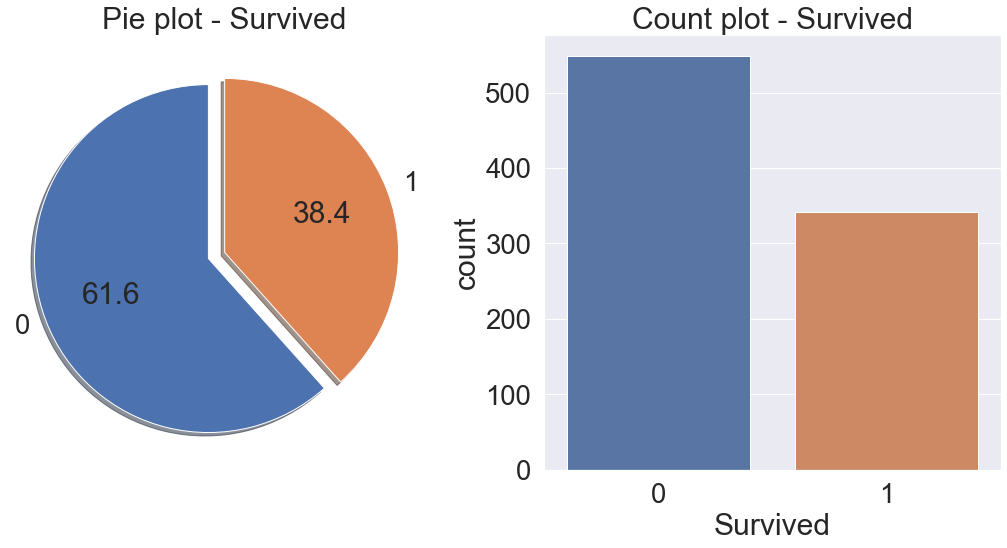

In [71]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(explode=[0.1, 0], autopct='%1.1f', ax=ax[0], shadow=True, startangle=90)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

explode=[0, 0.1] : 두 조각간의 거리, [subplot안에서 멀어짐, subplot 밖으로 멀어짐]  
autopct='%1.1f%%' : 각 범주가 데이터에서 차지하는 비율, %1.1f%% 는 첫%는 포맷이 사용가능하게 함, .1f는 소숫점 첫째자리까지 출력, 뒤의 %%를 제거하면 %가 값에서 제거    
ax=ax[0] : subplot에서 출력되는 위치 지정(0부터 시작)  
shadow=True : 그림자 여부  
startangle=90 : pie plot이 시작하는 각도  

- 전체의 38.4%의 인원만 생존(300명이 조금 넘음)
- 너무 치우친 데이터는 X  
(100개중 불량품 1개가 나오는 희귀현상 같은 경우에는 제대로 된 결과를 예측, 분류할 수  없음)